# Flownets
<p>Flownets are a method of determining groundwater flow that follows a nonuniform path, such as flow down and under a dam. Unlike in the first formulations of groundwater flow, vertical flow is incorporated into this model. The purpose of a flownet is to display equipotential lines on a graph and separate the flow into separate stream tubes.</p>
<br>
<p>For this example, I use a vertical cross-section with a dam in the center. The hydraulic head is higher on one side than the other, and flow is directed down and under the dam. Just like before, groundwater flows from regions of high hydraulic head to low, though now it may also flow downward. This means that the hydraulic head in a single column is not the same, which causes water to flow downwards on the region with higher head and downwards in the region with lower head.</p>

In [179]:
import matplotlib.pyplot as plt
import numpy as np

# The format of impermeable is: (lowerX, upperX, lowerY, upperY)
def check(i,j, impermeable):
    '''
    If this function returns True, it means that the given indices are NOT
    part of an impermeable barrier. In the flow function, this function is called
    to check if the given cell is a barrier, as well as before the queue is calculated
    for each element.
    '''
    if not ((impermeable[0] <= j <=impermeable[1]) and (impermeable[2] <= i <=impermeable[3])):
        return True
    else:
        #print("Caught a barrier: {} {}".format(i,j))
        return False
    


def verticalFlowSimple(heads, impermeable, conductivity):
    queue = np.zeros(heads.shape)
    length = heads.shape[1]
    depth = heads.shape[0]
    corners = ((0,0),(0, length-1), (depth-1, 0),(depth-1,length-1))
    
    for i in range(depth):
        for j in range(length):
            # Check if corner
            if not check(i,j,impermeable):
                pass
            elif (i,j) in corners:
                
                # Top left corner
                if (i,j) == corners[0]:
                    # Check to see if the index is in the bad range of numbers
                    if check(i + 1,j,impermeable):
                        queue[0,0] += heads[1,0] - heads[0,0]   # Down
                    if check(i + 1,j,impermeable):
                        queue[0,0] += heads[0,1] - heads[0,0]   # Left
                        
                # Top right corner
                elif (i,j) == corners[1]:
                    if check(i + 1, j, impermeable):
                        queue[i,j] += heads[1,j] - heads[0,j]   # Down
                    if check(i, j - 1, impermeable):
                        queue[i,j] += heads[i,j - 1] - heads[i,j] # Left
                        
                # Bottom left corner
                elif (i,j) == corners[2]:
                    if check(i - 1,j,impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]   # Up
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j + 1] - heads[i,j]   # Right
                        
                else:
                    if check(i - 1, j, impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]   # Up
                    if check(i, j - 1, impermeable):
                        queue[i,j] += heads[i, j - 1] - heads[i,j]  # Left
                    
                
            # Check if on edge
            elif ((i == 0 or i == depth - 1) or (j == 0 or j == length - 1)):
                # Top edge
                if i == 0:
                    if check(i + 1,j, impermeable):
                        queue[i,j] += heads[i + 1,j] - heads[i,j]  # Down
                    if check(i,j - 1, impermeable):
                        queue[i,j] += heads[i,j - 1] - heads[i,j]  # Left
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j + 1] - heads[i,j]  # Right
                        
                # Bottom edge
                elif i == depth - 1:
                    if check(i - 1,j, impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]  # Up
                    if check(i,j - 1, impermeable):
                        queue[i,j] += heads[i,j - 1] - heads[i,j]  # Left
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j + 1] - heads[i,j]  # Right
                        
                # Left edge
                elif j == 0:
                    if check(i - 1,j, impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]  # Up
                    if check(i + 1,j, impermeable):
                        queue[i,j] += heads[i + 1,j] - heads[i,j]  # Down
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j + 1] - heads[i,j]  # Right
                
                # Right edge
                else:
                    if check(i - 1,j, impermeable):
                        queue[i,j] += heads[i - 1,j] - heads[i,j]  # Up
                    if check(i + 1,j, impermeable):
                        queue[i,j] += heads[i + 1,j] - heads[i,j]  # Down
                    if check(i, j + 1, impermeable):
                        queue[i,j] += heads[i,j - 1] - heads[i,j]  # Left
                        
            # Execute main function
            else:
                if check(i - 1,j, impermeable):
                    queue[i,j] += heads[i - 1,j] - heads[i,j]  # Up
                if check(i + 1,j, impermeable):
                    queue[i,j] += heads[i + 1,j] - heads[i,j]  # Down
                if check(i, j + 1, impermeable):
                    queue[i,j] += heads[i,j + 1] - heads[i,j]  # Right
                if check(i,j - 1, impermeable):
                    queue[i,j] += heads[i,j - 1] - heads[i,j]  # Left
    
    heads += queue*conductivity
    return heads



                

### Explanation of the function
<p>In this new (really quite ugly) function, I am doing essentially what the previous function does: Calculate the head difference between adjacent cells and store that difference in a queue. Following this, the function then multiplies the queue by the hydraulic conductivity and applies the changes to the surrounding hydraulic heads. In order for this present formulation to work, the medium must be both heterogeneous and isotropic. I have neglected any time step or specific storage for the moment. The variable <b>impermeable</b> represents the impermeable region. At the moment, it an only represent rectangles.</p>
<p>When plotting the head values on a colormap, some formulations show a good gradient flowing around the barrier, but sometimes they show a weird gradient pattern that I think happens because the differences don't differ enough.</p>
<p>Things to improve:</p>

- Take into account pressure or saturation of blocks.
- Create custom color maps
- Create equipotential lines

<p>While the colors are useful, I cannot totally see what the shape of the flow is. I can see that flow is fastest just around the edge of the barrier, but I can't tell by how much. In order to do so, I'll need some equipotential lines.
</p>

In [228]:
# Edges
#------------------------------------------------------------------------------
def isEdge(arr, y, x):
    # Checks if the given value and positions are on an edge and NOT a corner
    if x == 0 or y == 0 or x == arr.shape[1]-1 or y == arr.shape[0]-1:
        return True
    else:
        return False
    
def isTopEdge(arr, y, x):
    # Checks if the given value is on the top edge
    if y == arr.shape[0]-1 and not (x==0 or x==arr.shape[1]-1): 
        return True
    else: 
        return False
    
def isBottomEdge(arr, y, x):
    # Checks if the given value is on the bottom edge
    if y == 0 and not (x==0 or x==arr.shape[1]-1):
        return True
    else:
        return False
    
def isLeftEdge(arr,y,x):
    # Checks if the position is on the left edge
    if x == 0 and not (y==0 or y==arr.shape[0]-1):
        return True
    else:
        return False
    
def isRightEdge(arr,y,x):
    # Checks if the position is on the right edge
    if x == arr.shape[1]-1 and not (y==0 or y==arr.shape[0]-1):
        return True
    else:
        return False
    
# Corners
#-------------------------------------------------------------------------    
def isCorner(arr,y,x):
    if (x == 0 or x == arr.shape[1] - 1) and (y == 0 or arr.shape[0] - 1):
        return True
    else:
        return False
    
def isBottomLeftCorner(arr,y,x):
    # Checks if the position is the bottom left
    if x==0 and y==0:
        return True
    else:
        return False
    
def isTopLeftCorner(arr,y,x):
    # Checks if the position is the top left
    if x == 0 and y == arr.shape[0]-1:
        return True
    else:
        return False
    
def isBottomRightCorner(arr,y,x):
    # checks if the position is the bottom right
    if x == arr.shape[1]-1 and y == 0:
        return True
    else:
        return False
    
def isTopRightCorner(arr,y,x):
    # Checks if the position is the top right
    if x == arr.shape[1]-1 and y == arr.shape[0]-1:
        return True
    else:
        return False
    

def equipotentialLines(heads, posX, posY, tolerance = .1):
    '''
    This function iterates over the array and determines
    if any adjacent cells (in the 4 directions and diagonals)
    differ a ratio of .1 or less to the original value
    '''
    
    equipotentialPoints = []
    standard = heads[posY, posX]
    for i in range(len(heads)):
        for j in range(len(heads)):
            # Check corner
            if isCorner(heads, i, j): 
                if isTopRightCorner(heads,i,j):
                    pass
                if isTopLeftCorner(heads,i,j):
                    pass
                if isBottomLeftCorner(heads,i,j):
                    pass
                if isBottomRightCorner(heads,i,j):
                    pass
            # Check for edges
            elif isEdge(heads,i,j):
                if isTopEdge(heads,i,j):
                    pass
                if isBottomEdge(heads,i,j):
                    pass
                if isLeftEdge(heads,i,j):
                    pass
                if isRightEdge(heads,i,j):
                    pass
            else:
                pass
            

[[0 1 2]
 [3 4 5]]
0 0 True
0 1 False
0 2 True
1 0 True
1 1 False
1 2 True
True


In [207]:
%%time
length = 11
heads = np.zeros((length,length))
heads[:,:int(length/2)] = 10
heads[:,int(length/2)] = -1
heads[:,int(length/2) + 1:] = 4
heads[0:int(length/2) + 1,int(length/2) + 1] = 10

#print("Heads before: ")
#print(heads)

impermeable = (int(length/2),int(length/2),int(length/2), length-1)

conductivity = .05

for i in range(1000):
    heads = verticalFlowSimple(heads, impermeable, conductivity)
    heads[-1,0] += 1
    if heads[-1,-1] <= 1:
        heads[-1,-1] = 0
    else:
        heads[-1,-1] -= 1

#print("\n-------------------------------------------\n")

#print("Heads after: ")
#print(heads)

Wall time: 991 ms


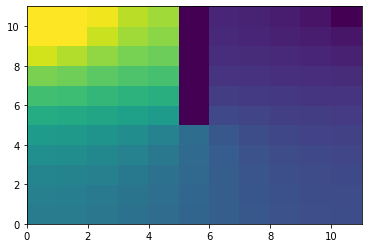

In [210]:
x = [i for i in range(length + 1)]
y = [i for i in range(length + 1)]

#print(np.round(heads,1))

plt.pcolormesh(x,y, heads, vmin = 0, vmax = 35)
plt.show()